# **CARGA DATA SET IMPORTACION LIBRERIAS**

In [ ]:
#Importación de paquete para leer y aplicar formulas estádisticas sobre datos tabulares
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
import kagglehub


In [ ]:
path = kagglehub.dataset_download("fahmidachowdhury/customer-segmentation-data-for-marketing-analysis")

Using Colab cache for faster access to the 'customer-segmentation-data-for-marketing-analysis' dataset.


In [ ]:
# Load the dataset into a variable named 'data'
data = pd.read_csv(path + '/customer_segmentation_data.csv')

El dataset fue descargado desde: https://www.kaggle.com/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis y se trata de datos simulados sobre el tipo y comportamiento de clientes de un supermercado.

# **EXPLORACION DEL SET DE DATOS**

Empezamos a conocer los datos, en este paso vemos como está compuesto el dataset, en cuanto a sus columnas y filas. El mismo cuenta con **9 columnas**, de las cuales **7 corresponden a datos cuantitativos** y **2 a datos cualitativos** con la siguiente descripción.

**DICCIONARIO**

**- id:** corresponde a un numero unico de identificacion de para cada cliente seleccionado de la muestra.

**- age:** Es la edad de los clientes.

**- gender:** Genero, clasificado como 'Male, Female, Other'

**- income:** Refiere al ingreso anual de cada cliente expresado en USD.

**- spending_score:** Un sistema de scoring que de 1-100 indicando el comportamiento de gasto y lealtad del cliente.

**- membership_years:** Cantidad de años que el cliente tiene membresia en el supermercado.

**- purchase_frecuency:** La cantidad de veces que el cliente realizó compras en el ultimo año.

**- preferred_category:** Categoria preferida por el cliente, categorizados en (Electronics, Clothing, Groceries, Home & Garden, Sports).

**- last_purchase_amount:** Cantidad de dinero (en USD) gastados en la ultima compra.













In [ ]:
data

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


**El data set presentado en sus primeras y ultimas 5 filas.**

In [ ]:
data.head(10)

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
5,6,31,Other,57305,24,3,30,Home & Garden,86.85
6,7,19,Other,54319,68,5,43,Clothing,191.72
7,8,43,Male,108115,94,9,27,Groceries,734.56
8,9,53,Male,34424,29,6,7,Sports,951.71
9,10,55,Female,45839,55,7,2,Electronics,821.18


**Primeras 10 filas de datos.**

In [ ]:
data.shape

(1000, 9)

**Forma del data set, 1000 filas; 9 columnas**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


**Cantidad de datos 'Nulos'=0 , tipos de datos.**

In [ ]:
data.describe()


,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


**Medidas de tendencia central y dispersion de los datos.**

In [ ]:
import pandas as pd
# Calculate the coefficient of variation for each quantitative column
def coef_variability(data):
    #Select quantitative columns
    numerical_cols = data.select_dtypes(include=['number'])
    #Create an empty dictionary to store the results
    coef_var = {}
    #Iterate over quantitative columns and calculate the coefficient of variation
    for col in numerical_cols.columns:
        mean_value = data[col].mean()
        std_dev = data[col].std()

        if mean_value != 0 : #check if the mean is zero to avoid ZeroDivisionError
            coef_var[col] = (std_dev / mean_value) * 100
        else:
            coef_var[col] = 0
    return coef_var

#Display the coefficient of variation as a grid
coef_variation = coef_variability(data)
coef_variation_df = pd.DataFrame.from_dict(coef_variation, orient='index', columns=['Coefficient of Variation'])
coef_variation_df


,Coefficient of Variation
id,57.706181
age,34.356287
income,38.678488
spending_score,57.127701
membership_years,52.216677
purchase_frequency,53.555623
last_purchase_amount,60.068051


**Coeficiente de variacion**

Segun los coeficientes de variacion podemos ver que los datos son dispersos, tienen gran variabilidad siendo el mas bajo de 34,36% que corresponde a la **edad 'age'** con un valor minimo de 18 y un maximo de 69.

Otro aspecto a resaltar es la gran variabilidad en el **ingreso 'income'**, con un minimo de 30000 y un maximo de 150000 lo cual denota una gran diferencia entre la capacidad de compra de los clientes.


**OBJETIVOS DEL PROYECYO**

Dado este data set vamos a analizarlo para poder encontrar patrones de comportamiento de compras, relaciones entre las variables, para poder realizar una *segmentacion de mercado* que nos permita mejorar la comercializacion y fidelidad de los clientes.

# **GRAFICOS**


**GRAFICO BOXPLOT**

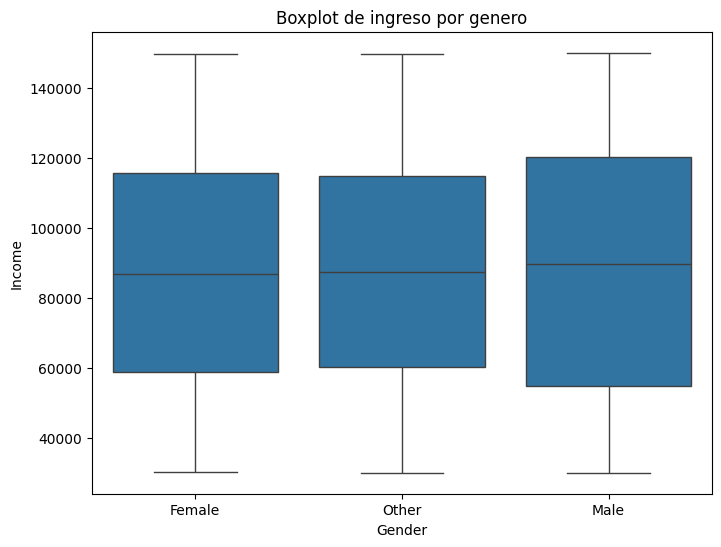

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='income', data=data)
plt.title('Boxplot de ingreso por genero')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()


Podemos observar de los graficos de boxplot que en cuanto a ingreso, la categoria 'Male' presenta el mayor rango intercuartilico, mientras que 'Other gender' el menor. Lo que indica que los datos están mas agrupados en este ultimo.

**GRAFICO DE BARRAS CANTIDAD DE CLIENTES POR CATEGORIA PREFERIDA**

En el grafico de barras sobre la cantidad de clientes por categoria, podemos observar que entre 'Sports' y 'Electronics' son los lideran el tipo de productos preferidos por los clientes.

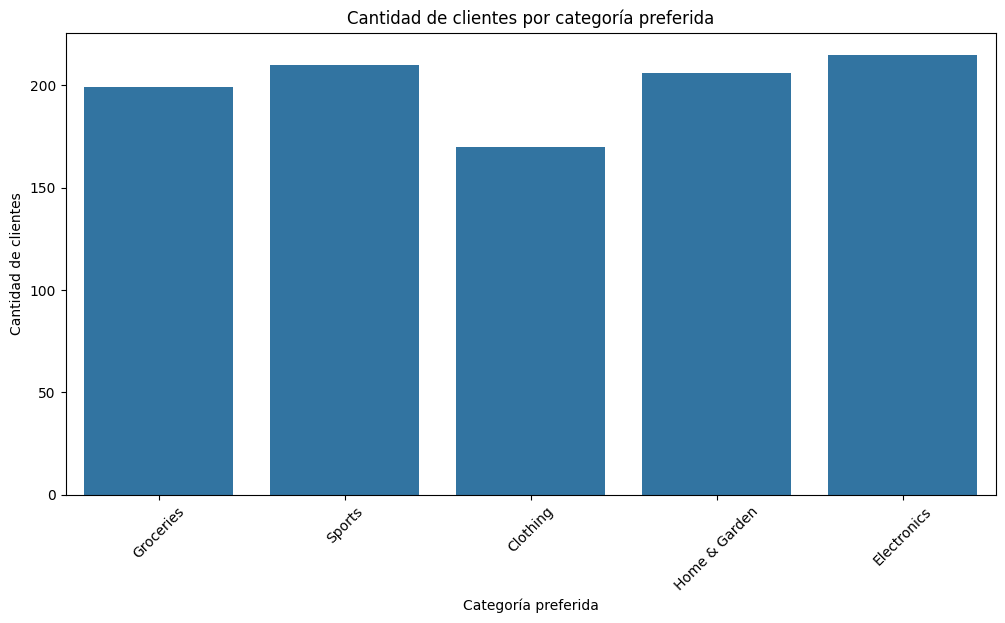

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='preferred_category', data=data)
plt.title('Cantidad de clientes por categoría preferida')
plt.xlabel('Categoría preferida')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.show()


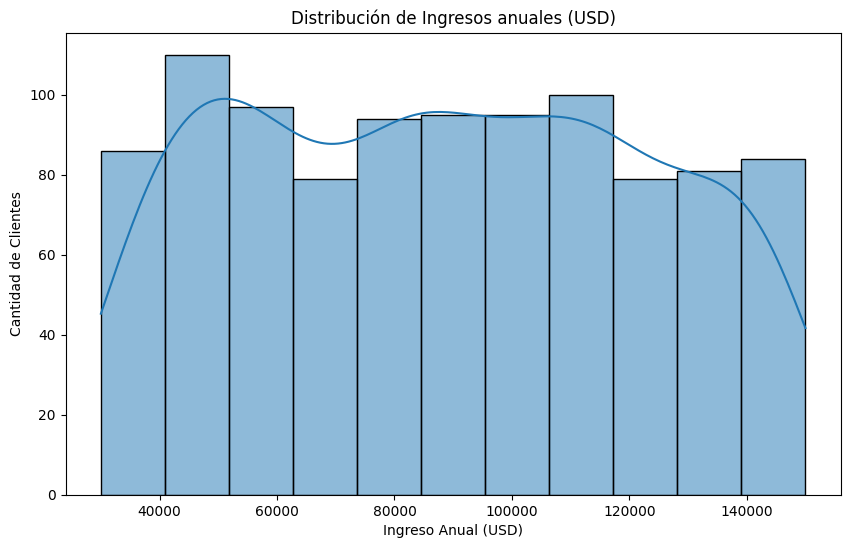

In [ ]:
# Grafico de la distribucion de 'income'

plt.figure(figsize=(10, 6))
sns.histplot(data['income'], kde=True)
plt.title('Distribución de Ingresos anuales (USD)')
plt.xlabel('Ingreso Anual (USD)')
plt.ylabel('Cantidad de Clientes')
plt.show()


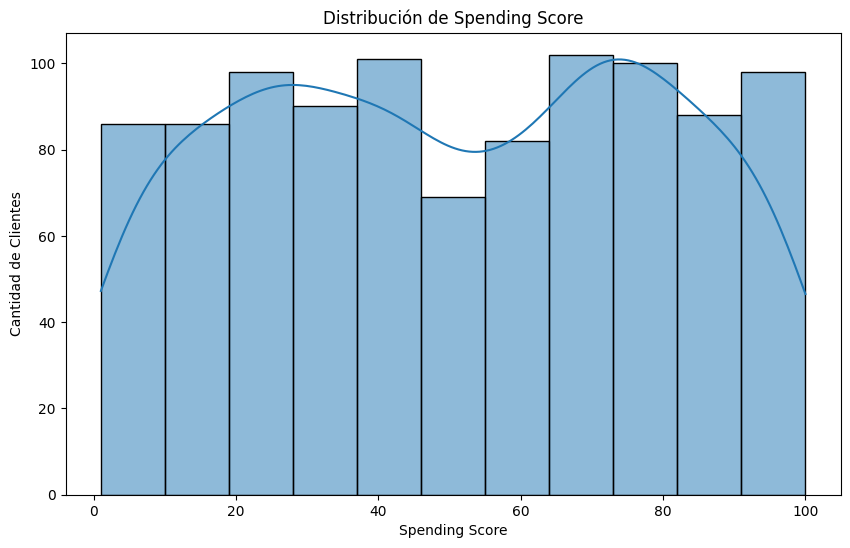

In [ ]:
# Grafico sobre la distribucion de spending_score

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data['spending_score'], kde=True)
plt.title('Distribución de Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Cantidad de Clientes')
plt.show()


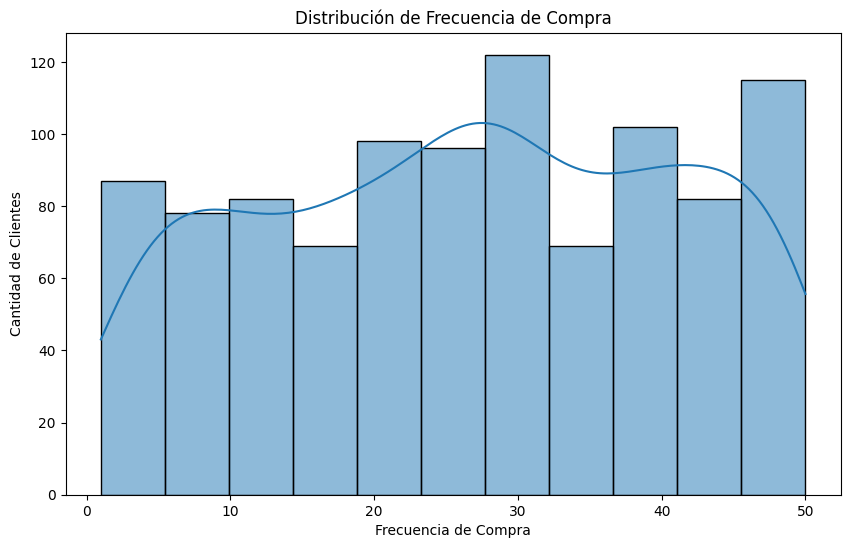

In [ ]:
# Grafico de la distribucion de purchase_frequency

plt.figure(figsize=(10, 6))
sns.histplot(data['purchase_frequency'], kde=True)
plt.title('Distribución de Frecuencia de Compra')
plt.xlabel('Frecuencia de Compra')
plt.ylabel('Cantidad de Clientes')
plt.show()


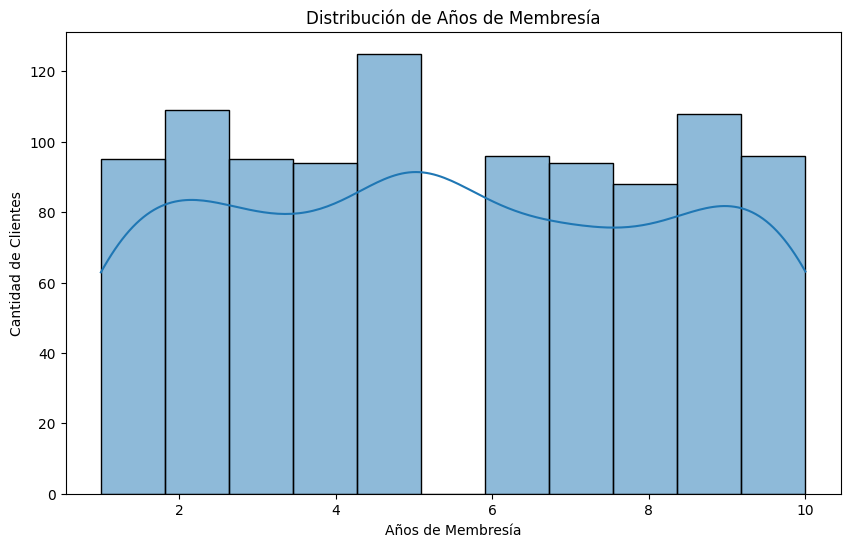

In [ ]:
# grafico de la distribucion de 'membership_years'

plt.figure(figsize=(10, 6))
sns.histplot(data['membership_years'], kde=True)
plt.title('Distribución de Años de Membresía')
plt.xlabel('Años de Membresía')
plt.ylabel('Cantidad de Clientes')
plt.show()


# **CODIFICACION DE VARIABLES CUALITATIVAS**

In [ ]:
#Codifica la variable gender asignando los valores 0,1,2 y muestra en 2 columnas que valor se asigno a cada genero
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}
data['gender'] = data['gender'].map(gender_mapping)

# Mostrar la codificación en dos columnas
gender_df = pd.DataFrame({'Gender': gender_mapping.keys(), 'Code': gender_mapping.values()})
gender_df


,Gender,Code
0,Male,0
1,Female,1
2,Other,2


In [ ]:
# Codificar 'preferred_category' en 'Electronics= 0; Clothing= 1; Groceries= 2; Home & Garden= 3; Sports= 4'
category_mapping = {'Electronics': 0, 'Clothing': 1, 'Groceries': 2, 'Home & Garden': 3, 'Sports': 4}
data['preferred_category'] = data['preferred_category'].map(category_mapping)
data.head(10)


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,1,99342,90,3,24,2,113.53
1,2,21,1,78852,60,2,42,4,41.93
2,3,60,1,126573,30,2,28,1,424.36
3,4,40,2,47099,74,9,5,3,991.93
4,5,65,1,140621,21,3,25,0,347.08
5,6,31,2,57305,24,3,30,3,86.85
6,7,19,2,54319,68,5,43,1,191.72
7,8,43,0,108115,94,9,27,2,734.56
8,9,53,0,34424,29,6,7,4,951.71
9,10,55,1,45839,55,7,2,0,821.18


In [ ]:
category_df = pd.DataFrame({'Preferred Category': category_mapping.keys(), 'Code': category_mapping.values()})
category_df


,Preferred Category,Code
0,Electronics,0
1,Clothing,1
2,Groceries,2
3,Home & Garden,3
4,Sports,4


In [ ]:
# elimina del data frame 'data' las columnas 'id', 'age'

data = data.drop(['id', 'age', 'last_purchase_amount', 'gender'], axis=1)


                      income  spending_score  membership_years  \
income              1.000000        0.000020         -0.035783   
spending_score      0.000020        1.000000          0.026726   
membership_years   -0.035783        0.026726          1.000000   
purchase_frequency  0.000533        0.006708          0.069532   
preferred_category -0.014575       -0.005608         -0.047470   

                    purchase_frequency  preferred_category  
income                        0.000533           -0.014575  
spending_score                0.006708           -0.005608  
membership_years              0.069532           -0.047470  
purchase_frequency            1.000000            0.020259  
preferred_category            0.020259            1.000000  


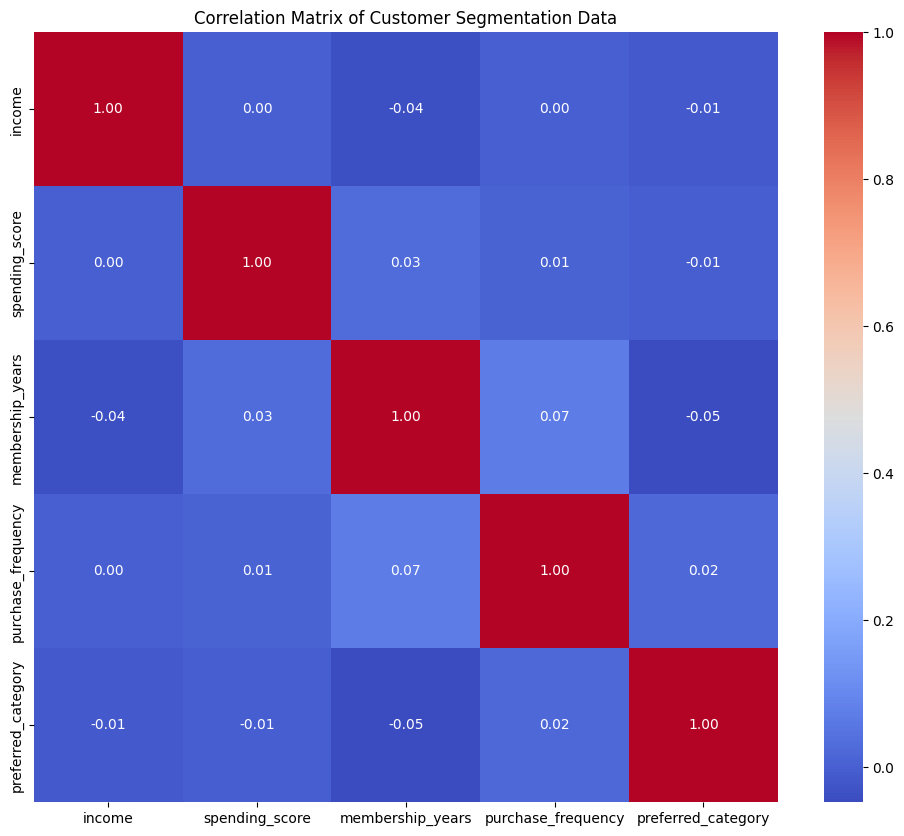

In [ ]:

correlation_matrix = data.corr() # Calculate correlation directly on 'data'
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Customer Segmentation Data')
plt.show()


#**IMPLEMENTACION DEL MODELO**

Vemos que de acuerdo a la matriz de correlacion graficada anteriormente, las categorias no presentan una relacion significativa. Entonces el modelo que vamos a utilizar es un modelo no supervisado para hacer una clusterizacion y agrupar los datos siguiendo algun patron que surja en la aplicacion del modelo. Y sacar concluciones para poder realizar estrategias de comercializacion.

**Feature selection**

Segun los analisis posteriores decidimos eliminar las columnas:

id: Solo representa un indice que refiere a cada cliente ordenado por aparicion.

gender: Segun los graficos y analisis posteriores (retroalimentacion de la aplicacion del modelo) no aporta informacion relevante para este analisis de comportamiento, ni surgio ninguna agrupacion que merezca atencion.

last_purchase_amount: Como estamos analizando patrones de comportamiento de compras, no consideramos relevante el monto de una sola compra.

age: Los analisis demostraron que la edad no es un dato relevante para la clusterizacion.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

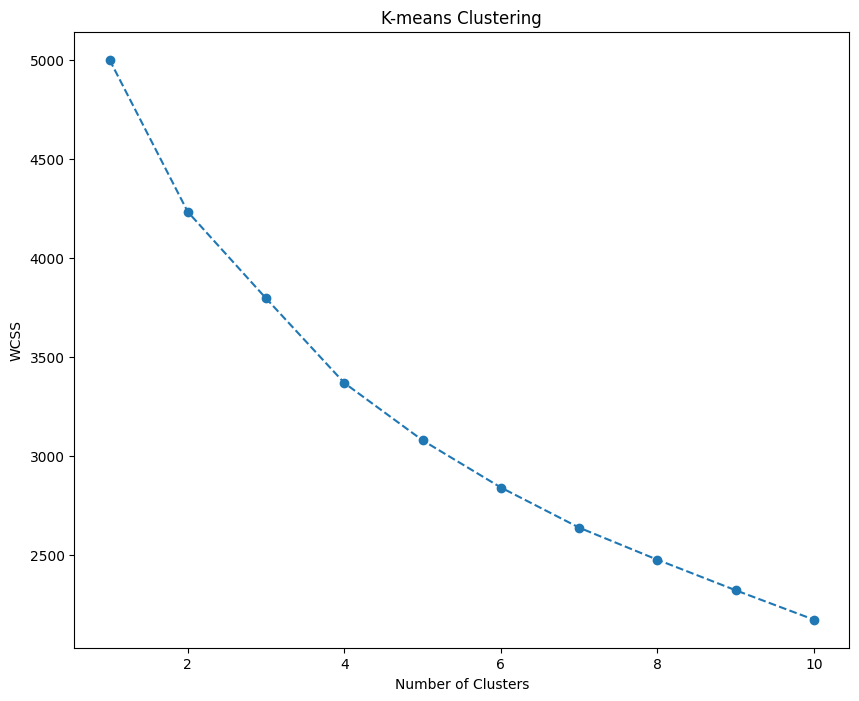

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [ ]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [ ]:
df_segm_kmeans = data.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [ ]:
df_segm_kmeans.head()

,income,spending_score,membership_years,purchase_frequency,preferred_category,Segment K-means
0,99342,90,3,24,2,3
1,78852,60,2,42,4,3
2,126573,30,2,28,1,2
3,47099,74,9,5,3,3
4,140621,21,3,25,0,2


In [ ]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means'])[df_segm_kmeans.select_dtypes(include=np.number).columns].mean()
df_segm_analysis

,income,spending_score,membership_years,purchase_frequency,preferred_category,Segment K-means
Segment K-means,,,,,,
0,67386.073469,25.604082,6.444898,21.097959,1.371429,0.0
1,91509.600000,73.056522,8.282609,34.539130,1.678261,1.0
2,113924.498008,29.199203,4.075697,31.529880,2.549801,2.0
3,81565.529197,74.014599,3.510949,20.324818,2.423358,3.0


**ATRIBUTOS DE LOS DATOS**

income: Salario promedio de los clientes expresado en U$D por año.

spending_score: de 1-100 un scoring puntuando el gasto por cliente.

membership_years: Cantidad de años de membresia de los clientes de 1 a 10 años

purchase_frequency: Cantidad de veces que realizo compras el cliente en un año de 1 a 50.

preferred_category: (0) Art electronicos, (1) ropa, (2) comestibles, (3) casa y jardin, (4) deportes.


*Segmento 0*

income: (67386.073 U$D x año) de bajos ingresos

spending_score: (25.6) un bajo scoring de gasto, acorde a el bajo nivel de salario x año.

membership_years: (6.44) entre 6 y 7 años de membresia, una metrica media alta que refleja la fidelidad de los clientes de bajos ingresos.

purchase_frequency: (21.09) una frecuencia baja de compras, comparado con los años de membresia.

preferred_category: La categoria preferida de este segmento, son los articulos de ropa y comestibles.

*Segmento 1*

income: (91509.6 U$D x año) nivel de ingresos medios altos

spending_score: (73.06) un gran nivel de scoring de gasto, que se ajusta a su nivel de salario.

membership_years: (8.28) entre 8 y 9 años de membresia, una gran fidelidad que refleja tambien su nivel de gasto en la empresa.

purchase_frequency: (34.54) una frequencia de compra alta, que sumado al scoring de gasto y los años de membresia denotan que es el segmento mas fidelizado de todos.

preferred_category: la categoria preferida de este segmento son los comestibles, podemos inferir que son clientes altamente fidelizados que eligen a la empresa para las compras cotidianas.

*Segmento 2*

income: (113924.15) nivel de ingresos altos

spending_score: (29.2) un scoring de gasto muy bajo considerando el nivel de ingreso.

membership_years: (4.07) 4 años de membresia, demostrando una fidelidad media baja, acorde al scoring de gasto.

purchase_frequency: (31.53) con una frecuencia de compra alta, podemos inferir que eligen a la empresa para compras de productos en particular, pero no representan una eleccion de gastos significativos.

preferred_category: La categoria preferida de este segmento son los articulos de 'casa y jardin', junto con comestibles. Esto demuestra que son compradores frecuentes, pero de articulos secundarios, es decir, no representan sus principales gastos.

*Segmento 3*

income: (81565.53) nivel de ingresos medios bajos.

spending_score: (74.01) el scoring de gasto mas alto. Una metrica que resulta llamativa dado el nivel de ingresos.

membership_years: (3.51) enter 3 y 4 años de membresia, representan los clientes menos fidelizados.

purchase_frequency: (20.32) la frecuencia de compra mas baja, lo que resulta congruente con la baja fidelizacion.

preferred_category: categoria preferida de este segmento son los comestibles, por lo que podriamos inferir que son compradores que aprovechan ofertas esporadicas, pero no eligen a la empresa como principal proveedora.

**RENOMBRAMIENTO DE SEGMENTOS**

0 - Media fidelidad

1 - Alta fidelidad

2 - Baja fidelidad

3 - clientes ocacionales

In [ ]:
df_segm_analysis.rename({0:'Media fidelidad',
                         1:'Alta fidelidad',
                         2:'Baja fidelidad',
                         3:'Clientes ocacionales'})

,income,spending_score,membership_years,purchase_frequency,preferred_category,Segment K-means
Segment K-means,,,,,,
Media fidelidad,67386.073469,25.604082,6.444898,21.097959,1.371429,0.0
Alta fidelidad,91509.600000,73.056522,8.282609,34.539130,1.678261,1.0
Baja fidelidad,113924.498008,29.199203,4.075697,31.529880,2.549801,2.0
Clientes ocacionales,81565.529197,74.014599,3.510949,20.324818,2.423358,3.0


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)


KMeans(n_clusters=4)

In [ ]:
labels = kmeans.labels_

In [ ]:
silhouette_avg = silhouette_score(data,labels)

print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5819218961910851


Un Silhouette score de 0.5 sugiere que los puntos están más cerca de los puntos de su propio clúster que de los de otros clústeres, pero no de manera tan clara. Hay cierta superposición entre los clústeres.

# **CONCLUSION**


Despues de haber aplicado el modelo de ML no supervisado de clusterizacion (Kmeans) logramos una clasificacion de los clientes en relacion a su fidelidad con la empresa. A traves de conclusiones que fuimos desarrollando combinando metricas de comportamiento de clientes tales como scoring de gasto, años de membresia y frecuencias de compras principalmente, pudimos extraer informacion relevante de los datos que nos permite conocer de manera mas clara la gama de clientes. Y de esta manera nos hicimos de mas herramientas para abordar estrategias de comercializacion que nos den un enfoque mas dinamico y preciso que nos permita competir en un mercado altamente competitivo.